In [1]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
X = data['data']
X_rm = X[:, 5]
Y = data['target']

In [5]:
import numpy as np
import random

## 1.Random with nothing

In [6]:
theta_0 = random.random() * 200 - 100
theta_1 = random.random() * 200 - 100

attempts = list(range(2000))


min_loss = float('inf')

count = 0
for _ in attempts:
    theta_0 = random.random() * 200 - 100
    theta_1 = random.random() * 200 - 100
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        count += 1
        min_loss = current_loss
        best_theta_1, best_theta_0 = theta_1, theta_0
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

Sequence 10: with loss 50.056416233797414 when theta_1 = 6.934838328683796, theta_0 = -19.015014051839714


-40.894779855028005 31.298130698130223


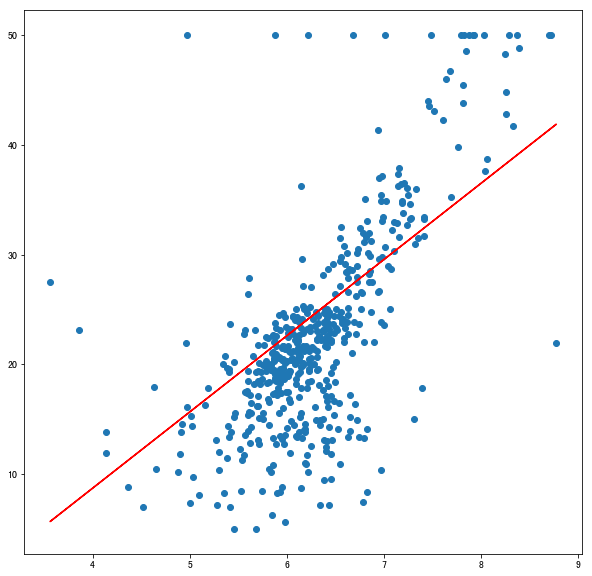

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
best_y_hat = X_rm * best_theta_1 + best_theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 2.Random with direction calibration
> 表现还不如Random with nothing

In [8]:
theta_0 = random.random() * 200 - 100
theta_1 = random.random() * 200 - 100

attempts = list(range(200000))
direction = [
    (1, 1),
    (1, -1),
    (-1, 1),
    (-1, -1)
]
scalar = .1
min_loss = float('inf')
new_direction = random.choice(direction)
count = 0
print(theta_1, theta_0)
for _ in attempts:
    new_0, new_1 = new_direction
    new_theta_0, new_theta_1 = best_theta_0 + scalar * new_0, best_theta_1 + scalar * new_1
    y_hat = X_rm * new_theta_1 + new_theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        count += 1
        min_loss = current_loss
        best_theta_0, best_theta_1 = new_theta_0, new_theta_1
#         new_direction = new_direction
#         print(f"Sequence {_}: with loss {current_loss} when theta_0 = {new_theta_0}, theta_1 = {new_theta_1}")
    else:
        new_direction = random.choice(direction)
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

-71.36841735710482 -46.720985393254466
Sequence 3: with loss 46.80203823503834 when theta_1 = 6.634838328683797, theta_0 = -18.71501405183971


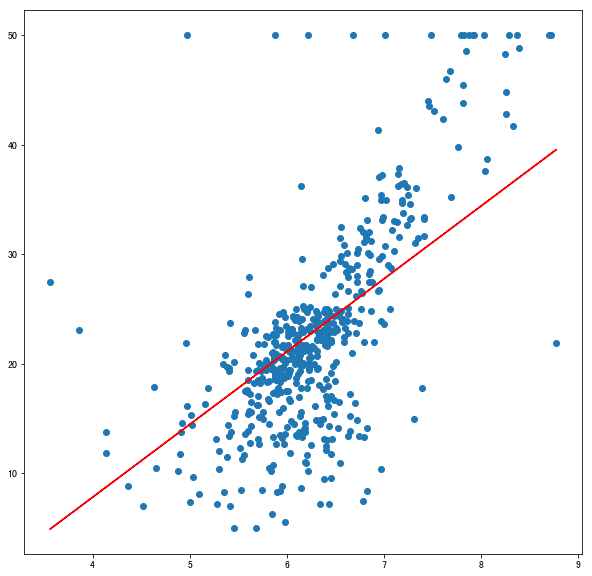

In [9]:
best_y_hat = X_rm * best_theta_1 + best_theta_0
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 3.Gradient descent with square loss function

In [10]:
learning_rate = random.random() / 10000
learning_rate

9.360494438965789e-05

In [11]:
# %%time
theta_1 = random.random() * 200 - 100
theta_0 = random.random() * 200 - 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        difference = min_loss - current_loss
#         if update_count % 5000 == 0:
#             print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * 2 * np.sum((y_hat - Y) * X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * 2 * np.sum(y_hat - Y) / len(Y)
    
    if difference <= 0.0001:
        flag = 0
print(f"{update_count} iterations to get best theta with {min_loss} and {current_loss}")
print(theta_1, theta_0)

1131 iterations to get best theta with 45.532584223192025 and 45.532584223192025
7.124791210587493 -22.16905747946079


7.124791210587493 -22.16905747946079


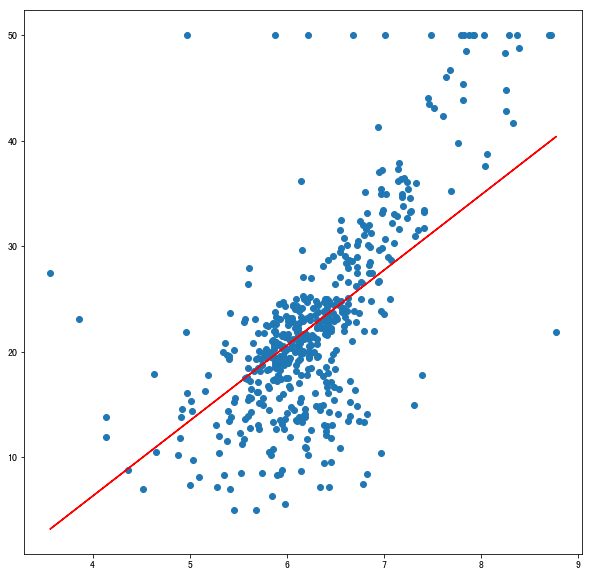

In [12]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

### 初始化几个问题：
* theta_0, theta_1的初始值选择
* 学习速率的选择
* 线性方程函数，。。。其他函数方程
* 代价函数的选择

## 4.Gradient descent with abs loss function

In [13]:
learning_rate = random.random() / 10000
learning_rate

3.372099852102841e-05

In [ ]:
# %%time
theta_1 = random.random() * 200 - 100
theta_0 = random.random() * 200 - 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.abs(Y - y_hat)) / len(Y)
    
    if min_loss > current_loss:
        difference = min_loss - current_loss
        if update_count % 5000 == 0:
            print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * np.sum(X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * np.sum(X_rm) / len(Y)
    
    if difference <= 0.0001:
        flag = 0
print(f"{update_count} iterations to get best theta with theta_1 = {theta_1} theta_0 = {theta_0}")

12.4220818227341 -54.94006544416371


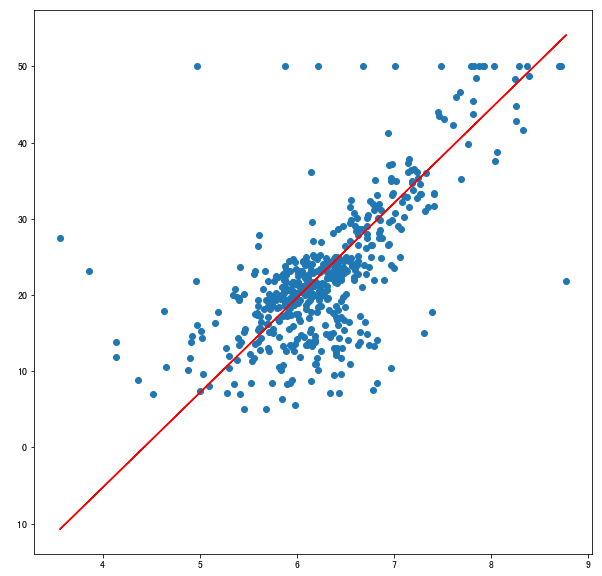

In [15]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 5.Dynamic Programming
> 重新解决w2的地铁路径搜索问题

In [16]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [167]:
from collections import defaultdict
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i + 1] = p
price[9]

24

In [189]:
call_time_with_args = defaultdict(int)
solution = {}
@get_call_count(call_time_with_args)
@memo
def get_max_price(n):
    """
    Return optimun of the combination.
    """

    max_price, max_split = max(
        [(price[n], 0)] + [(get_max_price(i) + get_max_price(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

In [190]:
get_max_price(30)

90

In [191]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10)}

In [192]:
call_time_with_args

defaultdict(int,
            {('get_max_price', (1,)): 58,
             ('get_max_price', (2,)): 56,
             ('get_max_price', (3,)): 54,
             ('get_max_price', (4,)): 52,
             ('get_max_price', (5,)): 50,
             ('get_max_price', (6,)): 48,
             ('get_max_price', (7,)): 46,
             ('get_max_price', (8,)): 44,
             ('get_max_price', (9,)): 42,
             ('get_max_price', (10,)): 40,
             ('get_max_price', (11,)): 38,
             ('get_max_price', (12,)): 36,
             ('get_max_price', (13,)): 34,
             ('get_max_price', (14,)): 32,
             ('get_max_price', (15,)): 30,
             ('get_max_price', (16,)): 28,
             ('get_max_price', (17,)): 26,
             ('get_max_price', (18,)): 24,
             ('get_max_price', (19,)): 22,
             ('get_max_price', (20,)): 20,
             ('get_max_price', (21,)): 18,
             ('get_max_price', (22,)): 16,
             ('get_max_price', (23,)): 14,
   

In [92]:
from collections import Counter
Counter(call_count_with_args).most_common()

[(('get_max_price', 1), 39366),
 (('get_max_price', 2), 13122),
 (('get_max_price', 3), 4374),
 (('get_max_price', 4), 1458),
 (('get_max_price', 5), 486),
 (('get_max_price', 6), 162),
 (('get_max_price', 7), 54),
 (('get_max_price', 8), 18),
 (('get_max_price', 9), 6),
 (('add_ten', 13), 4),
 (('get_max_price', 10), 2),
 (('add_ten', 123), 1),
 (('get_max_price', 11), 1)]

### Decorator

In [138]:
from functools import wraps
def get_call_count(call_count_dict):
    def get_function_call_count(f):
        @wraps(f)
        def wrap(*args):
            """
            This is wrap.
            """
            result = f(*args)
            call_count_dict[(f.__name__, args)] += 1
            return result
        return wrap
    return get_function_call_count

In [139]:
call_count_add = defaultdict(int)
@get_call_count(call_count_add)
def add_ten(n):
    return n + 10

In [140]:
add_ten(13)

23

In [141]:
call_count_add

defaultdict(int, {('add_ten', (13,)): 1})

In [145]:
def memo(f):
    cache = {}
    @wraps(f)
    def _wrap(*args):
        result = None
        if args in cache:
            result = cache[args]
        else:
            result = f(*args)
            cache[args] = result
        return result
    return _wrap